In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from math import sqrt, pi, e
from numpy.random import normal

In [2]:
def gaussian(x, mu, sigma):
    return (1/(sqrt(2*pi)*sigma))*(e**(-((x-mu)**2)/(2*(sigma**2))))

## Distribución normal teórica


## $$P(X) = \frac{1}{\sigma \sqrt{2 \pi}} e^{\left[-\frac{1}{2}\left(\frac{X-\mu}{\sigma} \right)^2 \right]}$$

* $\mu$: media de la distribución
* $\sigma$: desviación estándar de la distribución

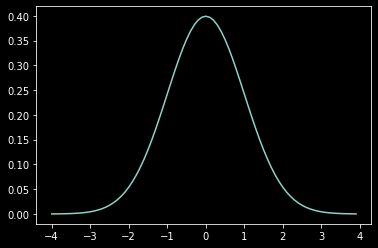

In [3]:
x=np.arange(-4,4,0.1)
y=gaussian(x,mu=0,sigma=1)
plt.plot(x,y)

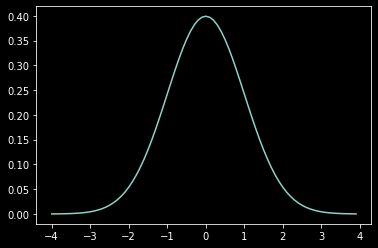

In [4]:
dist=norm(0,1)
x=np.arange(-4,4,0.1)
y=[dist.pdf(i) for i in x]
plt.plot(x,y)

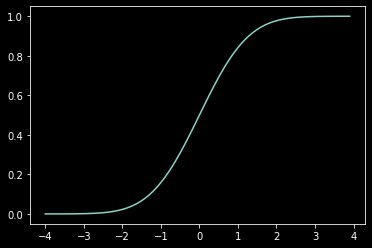

In [5]:
dist=norm(0,1)
x=np.arange(-4,4,0.1)
y=[dist.cdf(i) for i in x]
plt.plot(x,y)

In [6]:
df = pd.read_excel('s057.xls')
df

,Normally Distributed Housefly Wing Lengths,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,"Sokal, R.R., and P.E.Hunter. 1955.",NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,length (x.1mm),NaN,NaN,NaN
3,36,NaN,Bin,Frequency
4,37,NaN,36-38,2
...,...,...,...,...
98,52,NaN,NaN,NaN
99,53,NaN,NaN,NaN
100,53,NaN,NaN,NaN
101,54,NaN,NaN,NaN


<BarContainer object of 19 artists>

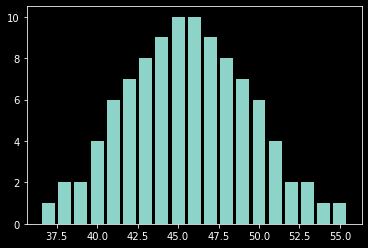

In [7]:
arr=df['Normally Distributed Housefly Wing Lengths'].values[4:]
values, dist1 = np.unique(arr,return_counts=True)
plt.bar(values,dist1)

<BarContainer object of 19 artists>

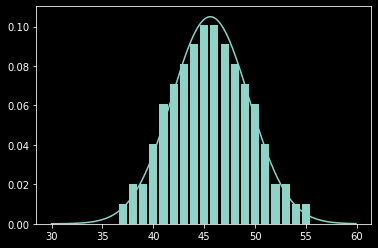

In [8]:
mu=arr.mean()
sigma=arr.std()
x=np.arange(30,60,0.1)
dist2=norm(mu,sigma)
y=[dist2.pdf(i) for i in x]
plt.plot(x,y)
plt.bar(values,dist1/len(arr))

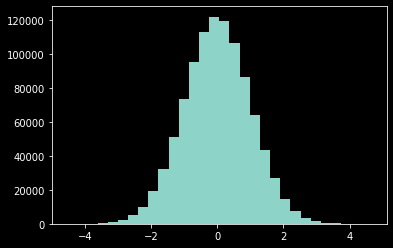

In [9]:
sample = normal(size=1000000)
plt.hist(sample,bins=30)
plt.show()

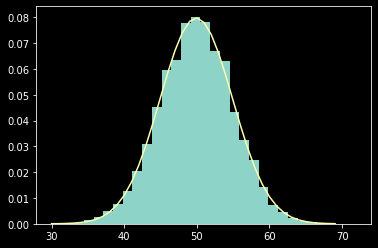

In [15]:
#parametric distribution

sample=normal(loc=50,scale=5,size=10000)
mu=sample.mean()
sigma=sample.std()
dist=norm(mu,sigma)
values=[value for value in range(30,70)]
probabilities=[dist.pdf(value) for value in values]
plt.hist(sample,bins=30,density=True)
plt.plot(values,probabilities)
plt.show()

In [17]:
##non-parametric distribution

from numpy import hstack
from sklearn.neighbors import KernelDensity

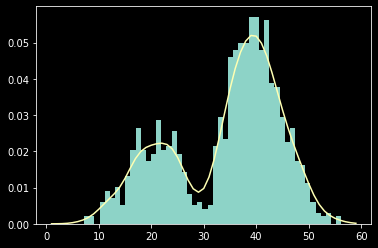

In [36]:
sample1=normal(loc=20,scale=5,size=300)
sample2=normal(loc=40,scale=5,size=700)
sample=hstack((sample1,sample2))

model=KernelDensity(kernel='gaussian',bandwidth=2)
sample=sample.reshape(len(sample),1)
model.fit(sample)

values=np.asarray([value for value in range(1,60)])
values=values.reshape(len(values),1)
probabilities=model.score_samples(values)
probabilities=np.exp(probabilities)

plt.hist(sample,bins=50,density=True)
plt.plot(values,probabilities)
plt.show()